In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path and format)
file_path = "BC_GHG_1990-2021.csv"  # Replace this with your actual file path
data = pd.read_csv(file_path, skiprows=2)  # Skip the first two rows

# Drop unnecessary columns or rows with NaN if needed
data = data.dropna(how='all', axis=1)  # Drop empty columns
data = data.dropna(how='all', axis=0)  # Drop empty rows (optional)

# Keep only the rows up to row 89 (Python is zero-indexed)
data = data.iloc[:85]  # Retain rows 0 to 84 (inclusive)

# Rename the specified columns
rename_mapping = {
    "Unnamed: 36": "2007->2021 pct",
    "Unnamed: 38": "2020->2021 pct",
    "Unnamed: 40": "3-Year Trend pct",
     "Unit: MtCO2e": "Year"
}
data = data.rename(columns=rename_mapping)

# Display the cleaned dataset
print(data.head())  # Preview the first few rows
print(data.tail())

                                      Year  1990  1991  1992  1993  1994  \
0                                   TOTAL1  54.7  53.3  52.2  54.9  57.3   
1                                   ENERGY  42.6  41.5  40.3  43.1  45.4   
2                    STATIONARY COMBUSTION  19.3  18.1  16.9  19.1  19.2   
3  Public Electricity and Heat Production    0.8   0.5   0.9   2.0   1.8   
4            Petroleum Refining Industries   1.2   1.2   1.0   0.7   0.7   

   1995  1996  1997  1998  ...  2018  2019  2020  2021 2007→2021  \
0  61.1  63.2  62.3  63.2  ...  66.2  65.2  61.4  62.0      -1.8   
1  49.1  51.0  49.9  50.7  ...  55.3  54.4  50.9  51.8      -0.2   
2  21.6  22.1  19.9  20.4  ...  21.9  21.2  20.6  20.9      -0.1   
3   2.3   0.6   1.1   1.8  ...   1.0   1.0   0.7   0.9      -0.4   
4   0.6   0.7   0.4   0.4  ...   0.4   0.5   0.4   0.4      -0.2   

  2007->2021 pct 2020→2021 2020->2021 pct 3-Year Trend 3-Year Trend pct  
0            -3%      +0.6            +1%         -4.2      

In [51]:
data = data.T
print(data.tail())  # Preview the first few rows

                    0     1     2     3     4     5     6     7     8     9   \
2007->2021 pct     -3%   -0%   -0%  -31%  -31%   +9%   -2%  -10%  -28%   +3%   
2020→2021         +0.6   0.9  +0.3  +0.2  +0.1  -0.2  +0.0  +0.0  -0.0  +0.1   
2020->2021 pct     +1%   +2%   +1%  +31%  +14%   -3%   +9%   +1%  -10%   +4%   
3-Year Trend      -4.2  -3.4  -1.0  -0.1  +0.1  -0.7  +0.0  -0.9  -0.0  +0.3   
3-Year Trend pct   -6%   -6%   -5%   -7%  +16%   -9%   +9%  -19%  -15%  +13%   

                  ...      76      77     78    79       80    81     82  \
2007->2021 pct    ...   +375%   +362%   -98%  -45%  +2,680%   -3%   +35%   
2020→2021         ...  +135.0  +134.9   +5.3  +0.1   +129.9  -0.4   +0.1   
2020->2021 pct    ...   +329%   +319%   -96%   +4%  +3,919%   -1%   +38%   
3-Year Trend      ...   -73.5   -73.7   -2.2  -1.8    -63.5  -6.3   +0.2   
3-Year Trend pct  ...    -29%    -29%  -112%  -40%     -32%  -13%  +145%   

                    83        84   85  
2007->2021 pct    -33%

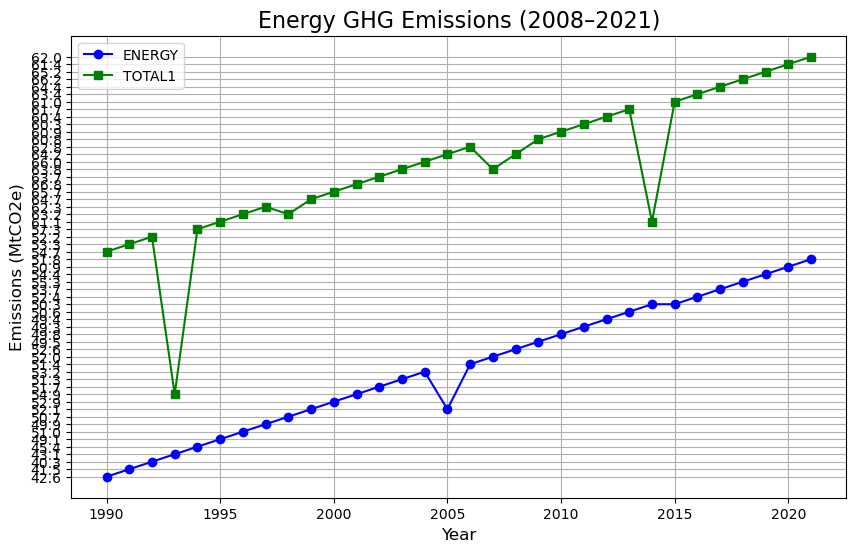

In [64]:
# Create a DataFrame
df = pd.DataFrame(data[:33])
df.columns = df.iloc[0]  # Use the first row as column names

df = df[1:]  # Drop the first row and reset index
df.index = pd.to_numeric(df.index, errors='coerce')

# Filter for years 2000-2021
df_filtered = df[(df.index >= 2008) & (df.index <= 2021)]

# Plot "ENERGY" vs "Year"
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["ENERGY"], marker='o', label="ENERGY", color="blue")
plt.plot(df.index, df["TOTAL1"], marker='s', label="TOTAL1", color="green")

# Add labels, title, and legend
plt.title("Energy GHG Emissions (2008–2021)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Emissions (MtCO2e)", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()